# Projet 3: Concevez une application au service de la santé publique

# - EXPLORATION NOTEBOOK 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly
from PIL import ImageColor
sns.set(font_scale=1)
from scipy import stats
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV
from scipy import stats,spatial
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
import scipy

In [2]:
df_cleaner = pd.read_csv("fichier_cleaner.csv", low_memory= False )
df_cleaner.head()

,Unnamed: 0,product_name,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,0,Banana Chips Sweetened (Whole),États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,0.0,0.0,...,14.29,3.6,3.57,20.066000,7.90000,0.003571,0.021400,0.304,0.00129,14.000000
1,1,Peanuts,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,0.0,0.0,...,17.86,7.1,17.86,0.635000,0.25000,0.002777,0.009700,0.071,0.00129,10.000000
2,2,Organic Salted Nut Mix,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,0.0,0.0,...,3.57,7.1,17.86,1.224280,0.48200,0.000107,0.006600,0.143,0.00514,12.000000
3,3,Breadshop Honey Gone Nuts Granola,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,NaN,0.0,0.0,...,11.54,7.7,13.46,20.813853,8.19443,0.000654,0.028100,0.038,0.00346,10.666667
4,4,Organic Muesli,États-Unis,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,"E123 - Amarante,E307a - Tocophérol",0.0,0.0,...,15.62,9.4,14.06,0.139700,0.05500,0.000092,0.008733,0.062,0.00422,7.000000


In [3]:
df_cleaner = df_cleaner.drop(columns = ["Unnamed: 0"], axis =1)

In [4]:
df_cleaner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188258 entries, 0 to 188257
Data columns (total 28 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   product_name                             187079 non-null  object 
 1   countries_fr                             188216 non-null  object 
 2   ingredients_text                         188069 non-null  object 
 3   serving_size                             165468 non-null  object 
 4   additives_n                              188069 non-null  float64
 5   additives                                188050 non-null  object 
 6   additives_fr                             123826 non-null  object 
 7   ingredients_from_palm_oil_n              188069 non-null  float64
 8   ingredients_that_may_be_from_palm_oil_n  188069 non-null  float64
 9   nutrition_grade_fr                       182105 non-null  object 
 10  states_fr                       

In [5]:
df_cleaner.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,188069.000000,188069.000000,188069.000000,188258.000000,188258.000000,188258.000000,188258.000000,188258.000000,188258.000000,188258.000000,188258.000000,188258.000000,1.882580e+05,1.882580e+05,1.882580e+05,188258.000000,188258.000000,1.882580e+05,188258.000000
mean,2.011251,0.023449,0.059733,1184.423889,15.117979,6.020077,3.411259,0.060695,33.828655,16.332262,3.901848,9.030822,1.841263e+00,7.271979e-01,7.874217e-04,0.018769,0.140264,3.392921e-03,10.824330
std,2.520119,0.153176,0.280763,737.201266,14.546183,6.901008,6.023804,0.344472,26.972105,18.520151,4.444683,7.917006,4.792490e+00,1.930619e+00,7.946943e-02,0.123771,0.686359,9.725613e-02,7.500698
min,0.000000,0.000000,0.000000,1.000000,0.001000,0.000100,0.000100,0.000045,0.001000,0.000500,0.001000,0.001000,5.000000e-08,1.968504e-08,2.000000e-07,0.000012,0.000031,2.160000e-07,1.000000
25%,0.000000,0.000000,0.000000,476.000000,3.330000,1.170000,0.553333,0.014667,8.850000,3.050000,1.500000,3.330000,1.981200e-01,7.800000e-02,8.740000e-05,0.004100,0.040000,8.500000e-04,3.666667
50%,1.000000,0.000000,0.000000,1197.000000,10.700000,3.400000,1.386667,0.038000,26.000000,7.140000,2.666667,6.820000,8.153400e-01,3.210000e-01,1.449000e-04,0.009000,0.071000,1.446667e-03,10.000000
75%,3.000000,0.000000,0.000000,1745.000000,23.330000,8.570000,3.486667,0.073667,58.330000,25.079167,4.400000,12.500000,1.554480e+00,6.120000e-01,3.192000e-04,0.019000,0.133000,2.626667e-03,16.333333
max,31.000000,2.000000,6.000000,3757.000000,99.900000,93.000000,83.000000,95.238000,99.900000,99.900000,90.000000,93.330000,9.360000e+01,8.300000e+01,2.670000e+01,35.714300,99.006000,2.500000e+01,40.000000


In [6]:
df_cleaner.shape

(188258, 28)

In [7]:
df_cleaner.duplicated().sum()

4255

In [8]:
def NaN_percent(df_cleaner, column_name):
    row_count = df_cleaner[column_name].shape[0]                
    empty_values = row_count - df_cleaner[column_name].count() 
    return (100.0*empty_values)/row_count               
for i in list(df_cleaner):                                     
    print(i +': ' + str(NaN_percent(df_cleaner,i))+'% des colonnes sont vides')

product_name: 0.6262682063976033% des colonnes sont vides
countries_fr: 0.022309808879303936% des colonnes sont vides
ingredients_text: 0.1003941399568677% des colonnes sont vides
serving_size: 12.105727246650872% des colonnes sont vides
additives_n: 0.1003941399568677% des colonnes sont vides
additives: 0.11048667254512425% des colonnes sont vides
additives_fr: 34.225371564555026% des colonnes sont vides
ingredients_from_palm_oil_n: 0.1003941399568677% des colonnes sont vides
ingredients_that_may_be_from_palm_oil_n: 0.1003941399568677% des colonnes sont vides
nutrition_grade_fr: 3.2683870008180262% des colonnes sont vides
states_fr: 0.0% des colonnes sont vides
nutrition_grade_fr.1: 0.0% des colonnes sont vides
energy_100g: 0.0% des colonnes sont vides
fat_100g: 0.0% des colonnes sont vides
saturated-fat_100g: 0.0% des colonnes sont vides
trans-fat_100g: 0.0% des colonnes sont vides
cholesterol_100g: 0.0% des colonnes sont vides
carbohydrates_100g: 0.0% des colonnes sont vides
sugars_

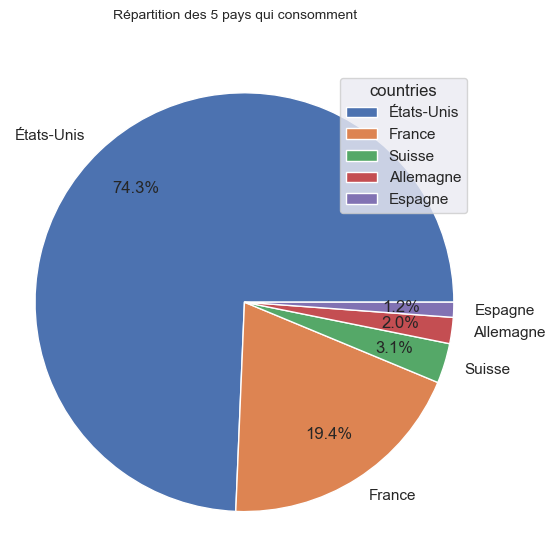

In [9]:
# On garde les 5 pays, les plus consomateurs

countrie=df_cleaner['countries_fr'].value_counts()
countrie=countrie[~countrie.index.str.contains(";")].nlargest(5)

fig,ax=plt.subplots(figsize=(6,6))
ax.pie(countrie, labels=countrie.index, counterclock=True , autopct='%1.1f%%', pctdistance=0.75)
ax.axis('equal')  
ax.legend(title="countries",loc="upper right")
fig.suptitle('Répartition des 5 pays qui consomment', fontsize=10)
plt.show()

In [10]:
df_nutritiongrade = df_cleaner[["nutrition_grade_fr"]]
df_nutritiongrade

,nutrition_grade_fr
0,d
1,b
2,d
3,NaN
4,c
...,...
188253,c
188254,b
188255,d
188256,a


In [11]:
colors=["green", "limegreen","gold", "darkorange", "red"]

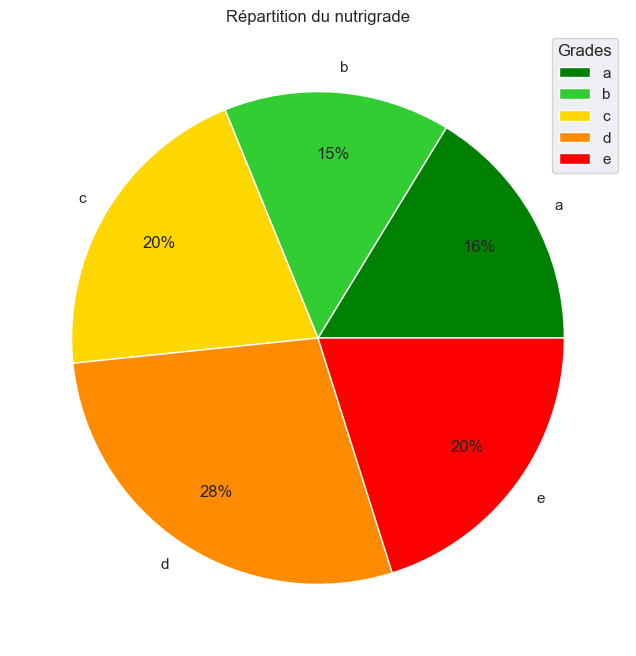

In [12]:
# j'affiche la répartition des nutrigrades
nutrigrade_count=df_cleaner['nutrition_grade_fr'].value_counts().reindex(index=['a','b','c','d','e'])

# pie plot 
fig,ax=plt.subplots(figsize=(8,8))
ax.pie(nutrigrade_count, labels=nutrigrade_count.index ,autopct='%1.0f%%',pctdistance=0.75, colors = ["green", "limegreen","gold", "darkorange", "red"] )
ax.set_title('Répartition du nutrigrade')
ax.legend(title="Grades")
plt.show()

In [13]:
num100_columns = df_cleaner.select_dtypes(include = ["float64"]).columns
num100_columns

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='fat_100g'>

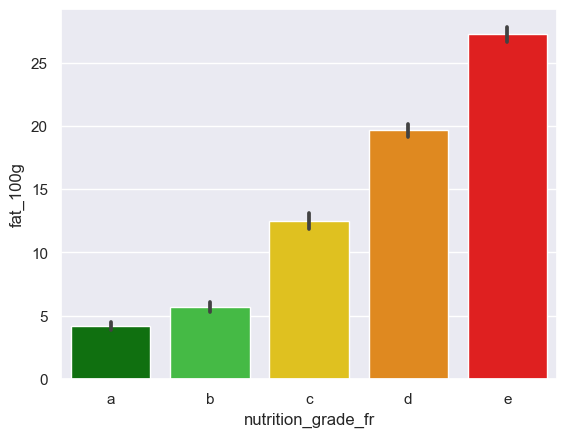

In [14]:
select_col = ['additives_n', 'ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g','carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g','calcium_100g', 'iron_100g', 'nutrition-score-fr_100g','nutrition_grade_fr']
df_grade = df_cleaner[select_col].sample(frac=.05).sort_values("nutrition_grade_fr")
sns.barplot(data=df_grade, y="fat_100g", x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='fiber_100g'>

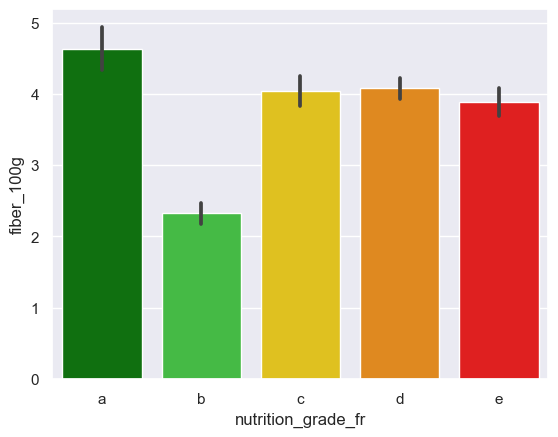

In [15]:
sns.barplot(data=df_grade, y= "fiber_100g" , x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='carbohydrates_100g'>

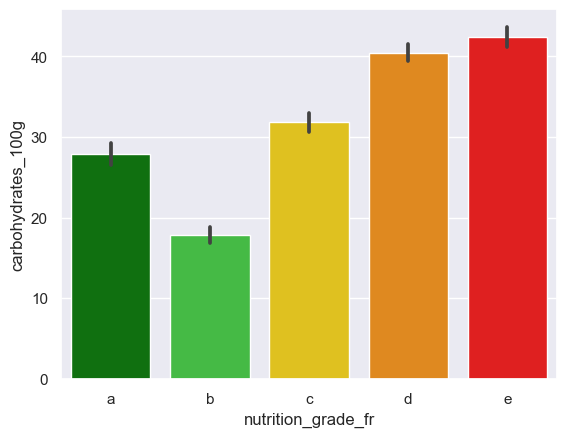

In [16]:
sns.barplot(data=df_grade, y="carbohydrates_100g", x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='additives_n'>

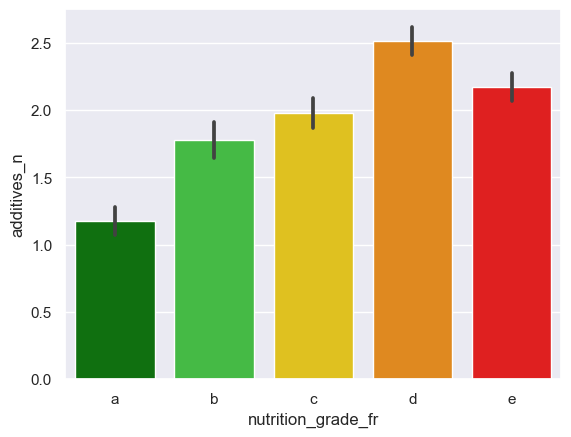

In [17]:
sns.barplot(data=df_grade, y='additives_n', x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='ingredients_from_palm_oil_n'>

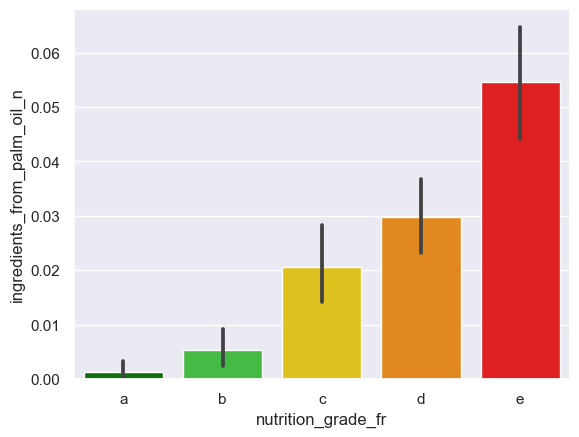

In [18]:
sns.barplot(data=df_grade, y='ingredients_from_palm_oil_n', x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='energy_100g'>

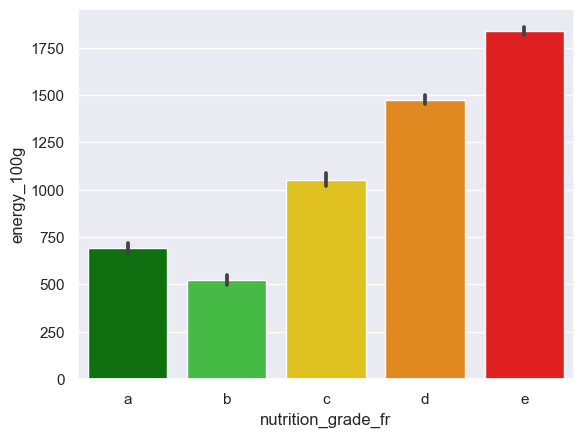

In [19]:
sns.barplot(data=df_grade, y= "energy_100g" , x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='saturated-fat_100g'>

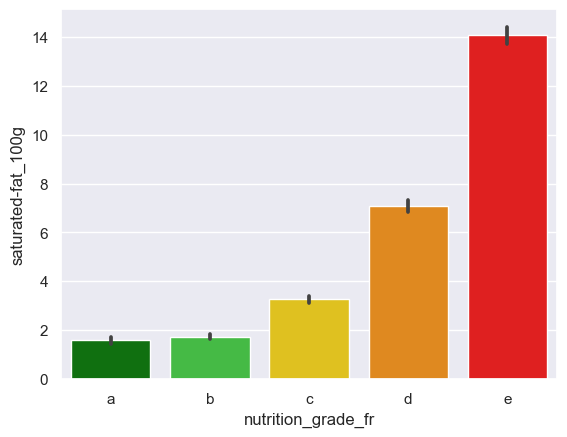

In [20]:
sns.barplot(data=df_grade, y= "saturated-fat_100g" , x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='trans-fat_100g'>

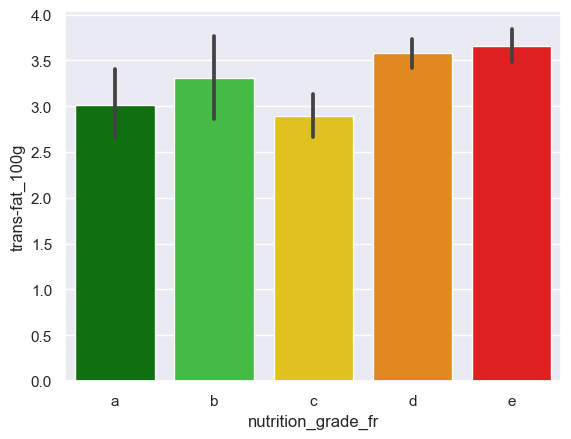

In [21]:
sns.barplot(data=df_grade, y= "trans-fat_100g" , x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='cholesterol_100g'>

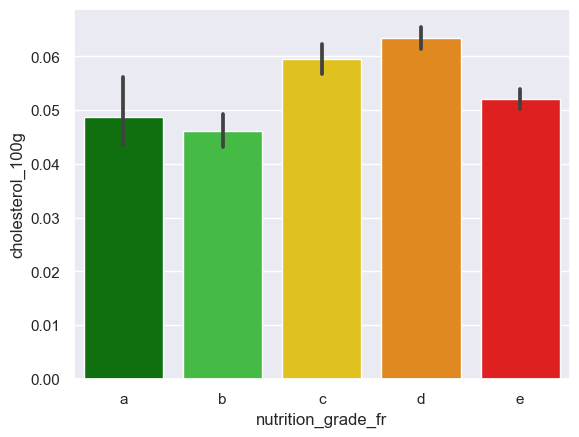

In [22]:
sns.barplot(data=df_grade, y= "cholesterol_100g" , x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='carbohydrates_100g'>

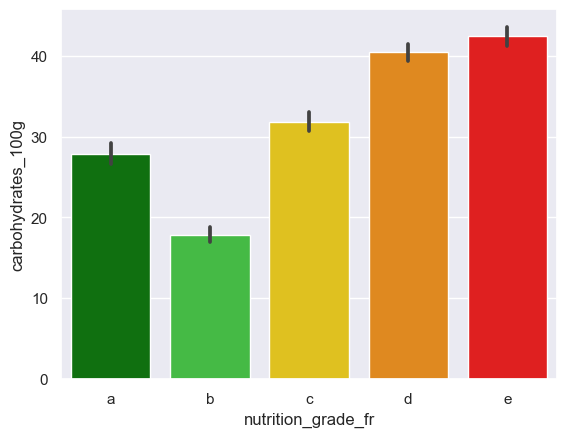

In [23]:
sns.barplot(data=df_grade, y= "carbohydrates_100g" , x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='sugars_100g'>

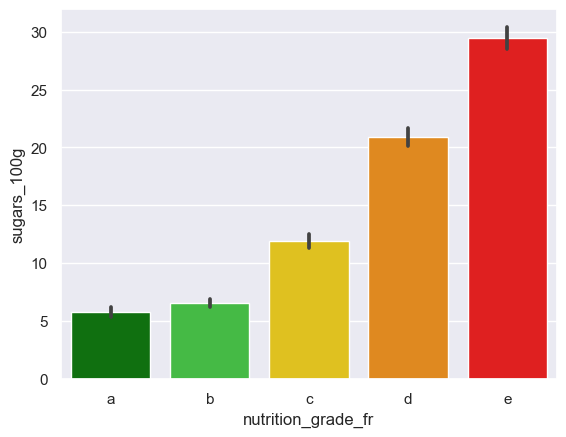

In [24]:
sns.barplot(data=df_grade, y= "sugars_100g" , x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='fiber_100g'>

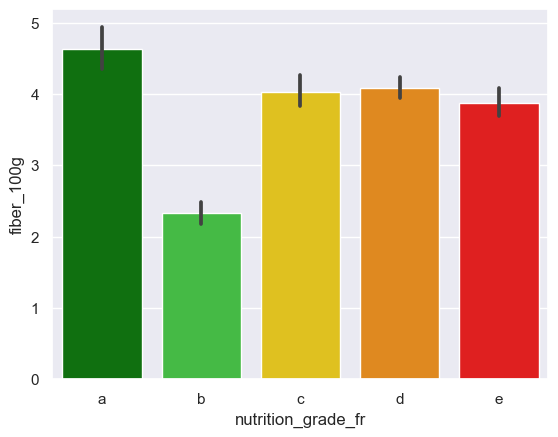

In [25]:
sns.barplot(data=df_grade, y= "fiber_100g" , x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='proteins_100g'>

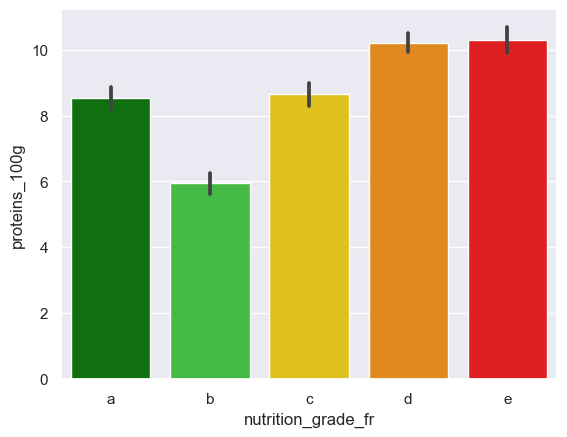

In [26]:
sns.barplot(data=df_grade, y= "proteins_100g" , x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='salt_100g'>

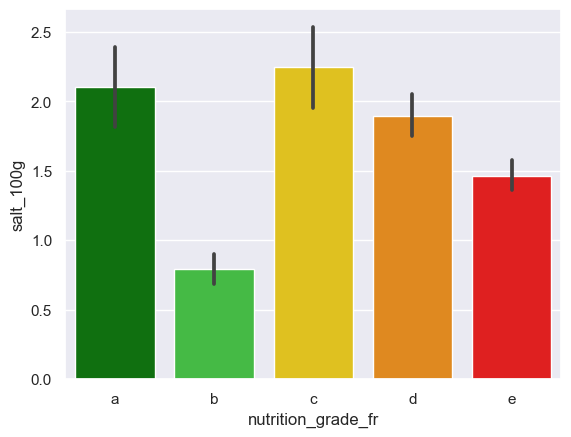

In [27]:
sns.barplot(data=df_grade, y= "salt_100g" , x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='sodium_100g'>

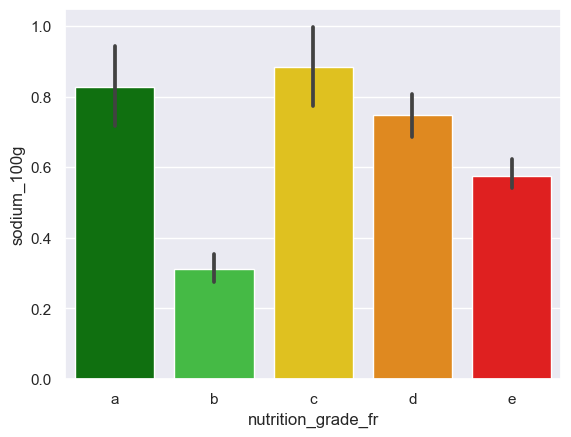

In [28]:
sns.barplot(data=df_grade, y= "sodium_100g" , x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='vitamin-a_100g'>

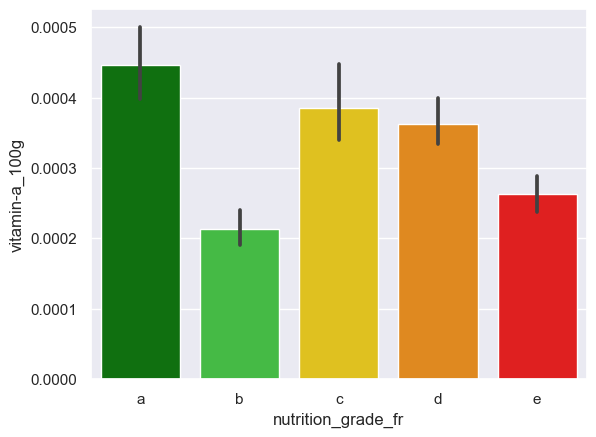

In [29]:
sns.barplot(data=df_grade, y= "vitamin-a_100g" , x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='vitamin-c_100g'>

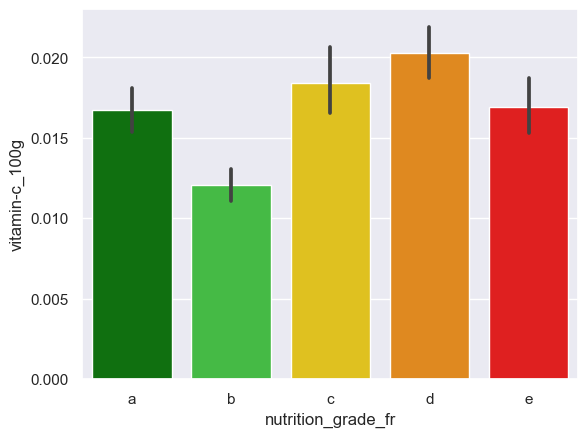

In [30]:
sns.barplot(data=df_grade, y= "vitamin-c_100g" , x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='calcium_100g'>

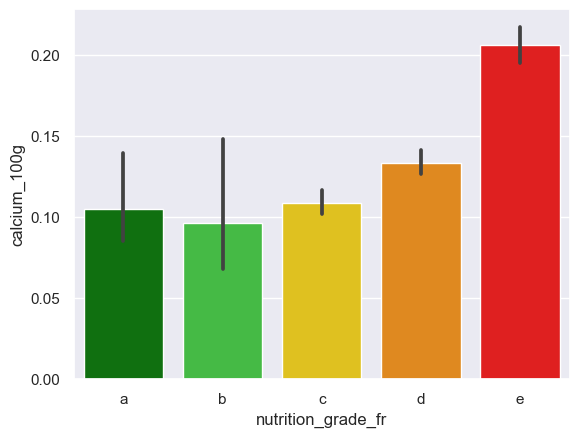

In [31]:
sns.barplot(data=df_grade, y= "calcium_100g" , x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='iron_100g'>

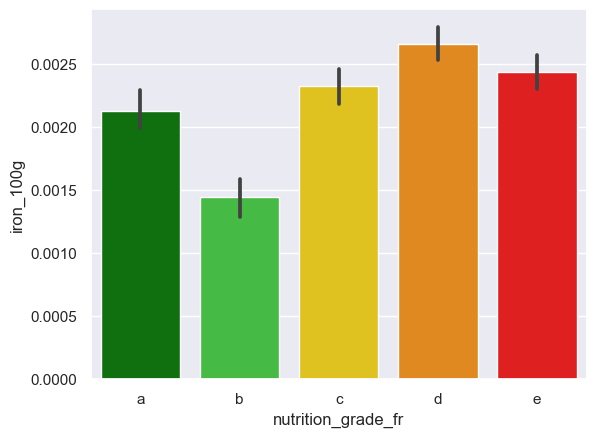

In [32]:
sns.barplot(data=df_grade, y= "iron_100g" , x="nutrition_grade_fr", palette =colors)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='nutrition-score-fr_100g'>

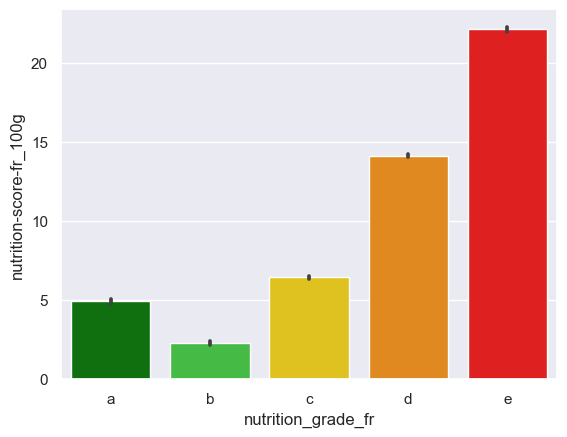

In [33]:
sns.barplot(data=df_grade, y= "nutrition-score-fr_100g" , x="nutrition_grade_fr", palette =colors)

# Analyse UNIVARIÉ & BIVARIÉ 

<AxesSubplot:ylabel='None'>

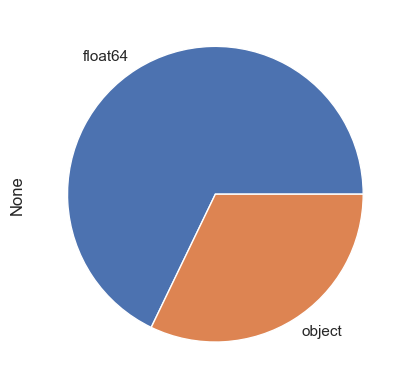

In [34]:
df_cleaner.dtypes.value_counts().plot.pie()

### - Analyse Univariée de distribution

/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

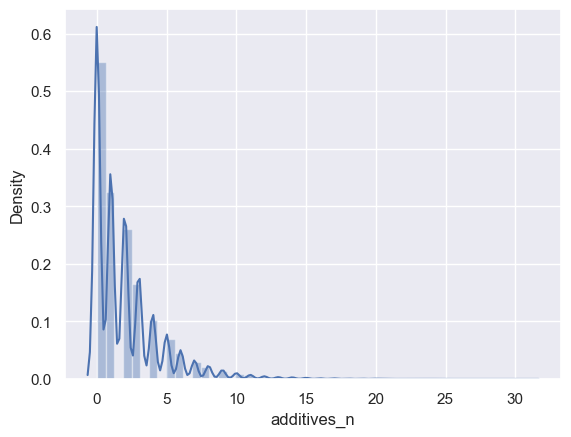

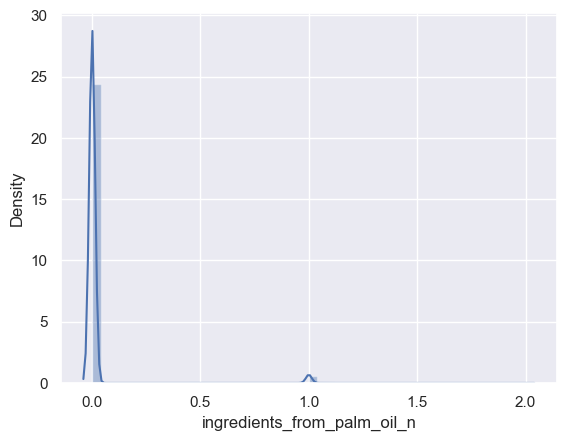

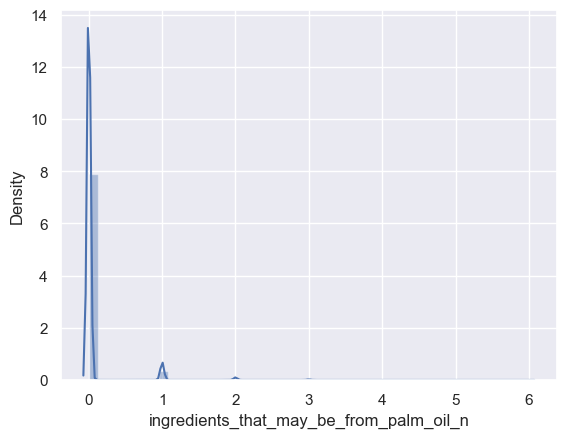

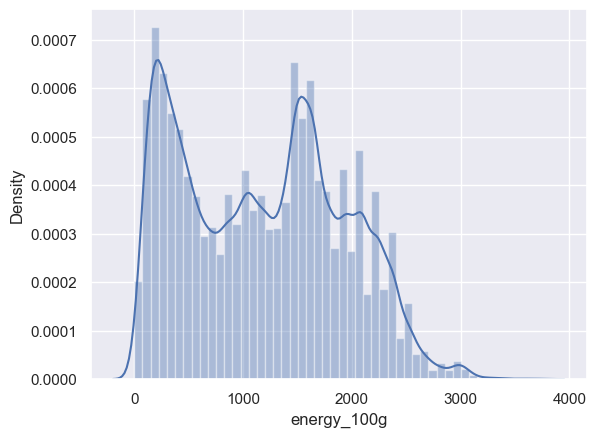

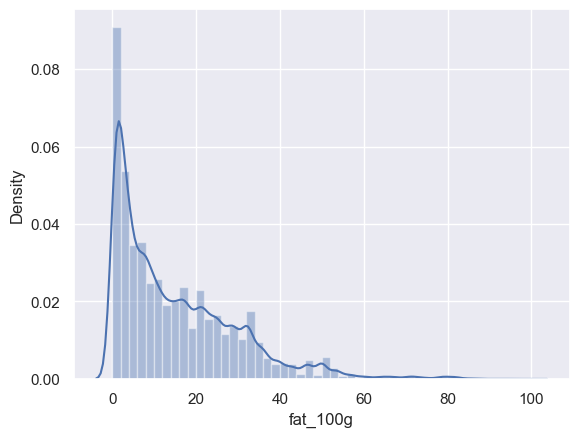

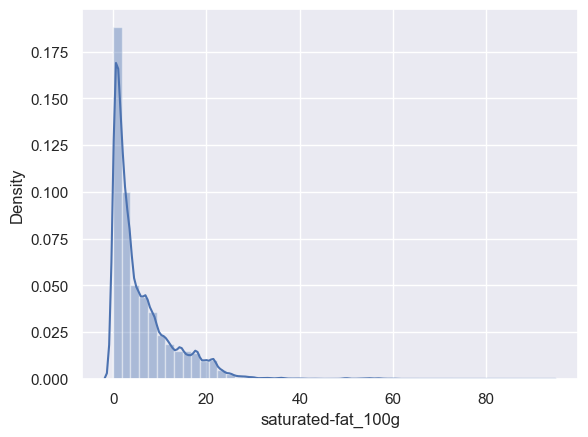

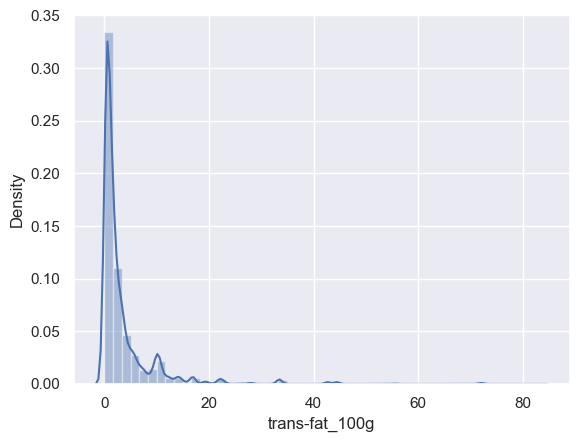

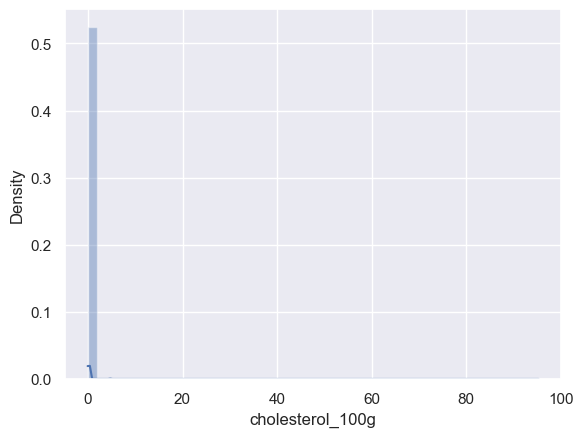

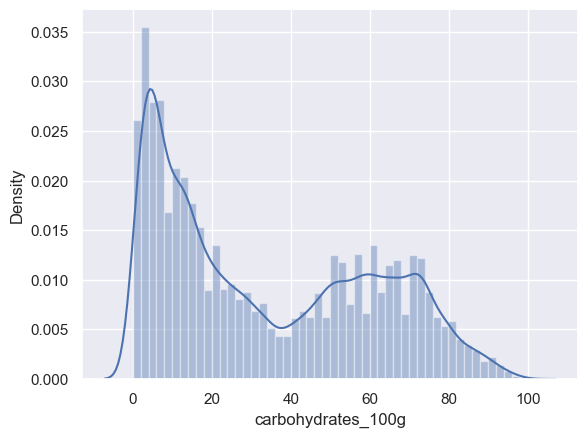

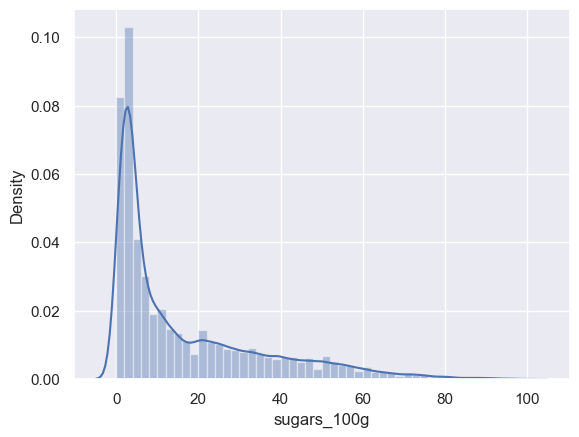

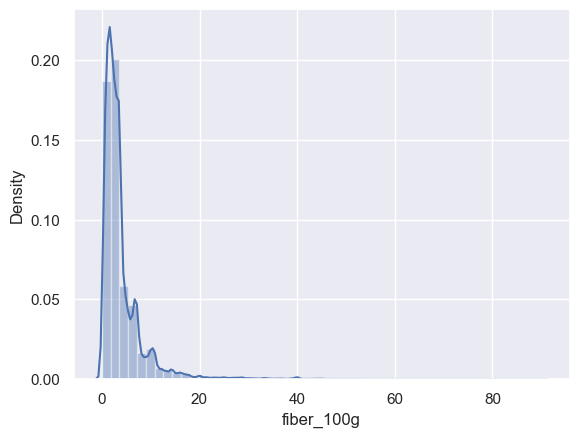

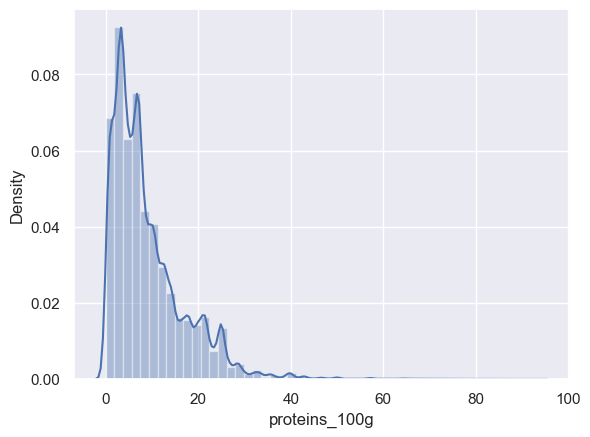

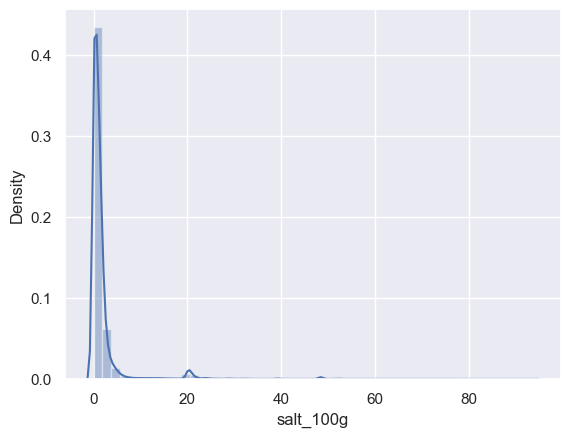

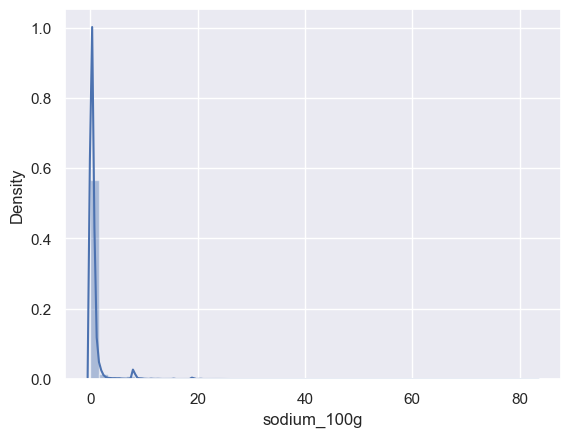

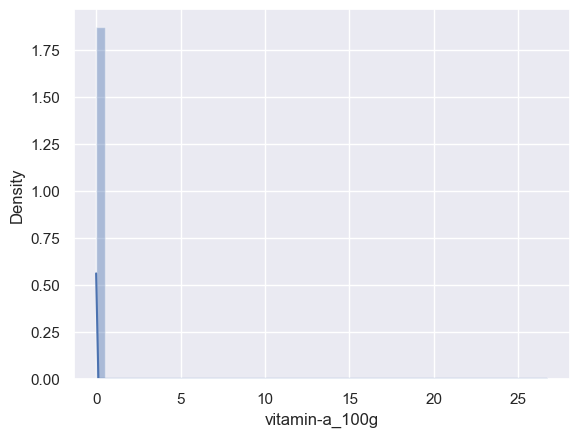

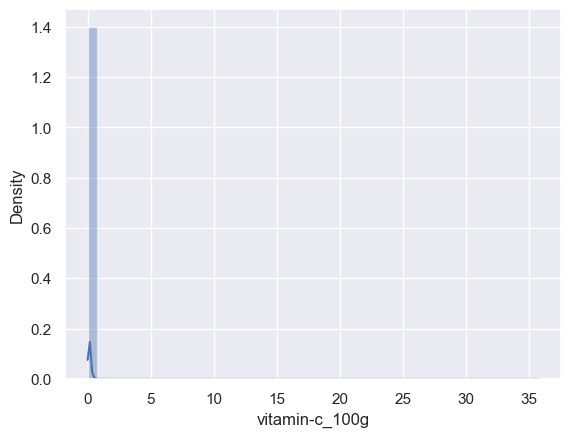

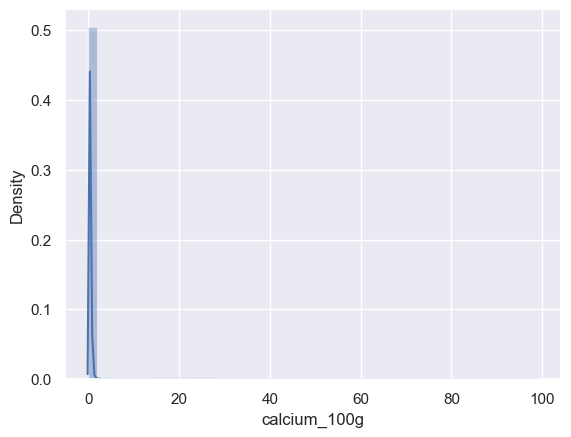

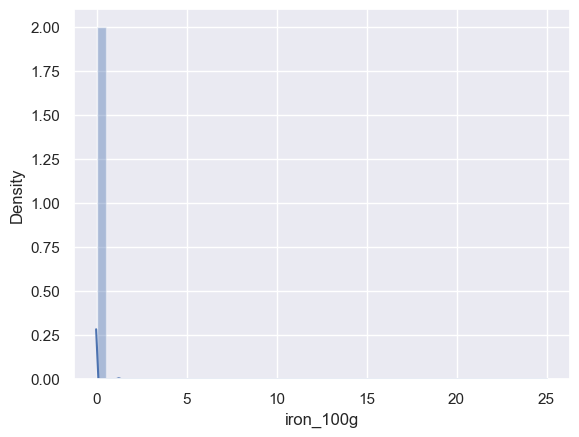

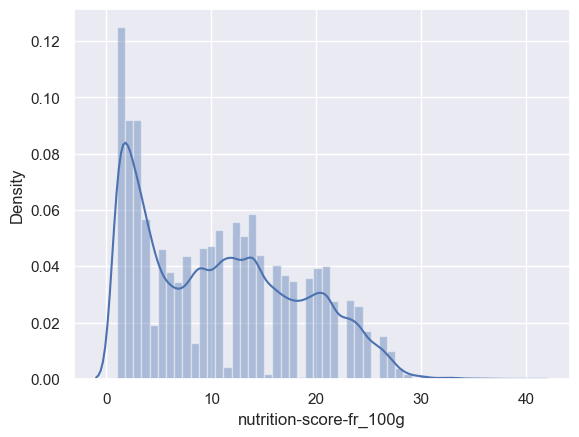

In [35]:
for col in df_cleaner.select_dtypes("float"):
    plt.figure()
    sns.distplot(df_cleaner[col])

- Aucune variable n'est centrée en 0

- Aucune variable suis une loi normale car la fonction de densité de probabilités de la loi normale à la forme d'une courbe en cloche symétrique.

Certaines variables sont discrètes:

- nutrition-score-fr_100g
- additives_n

/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

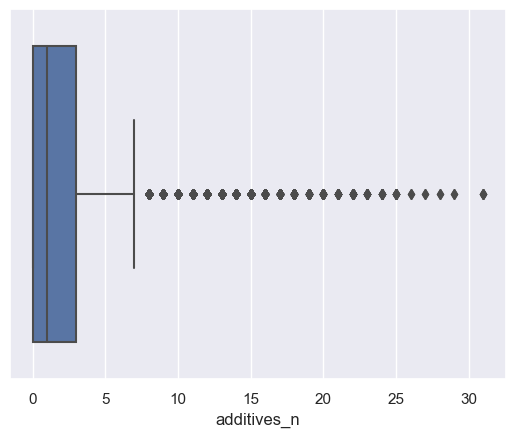

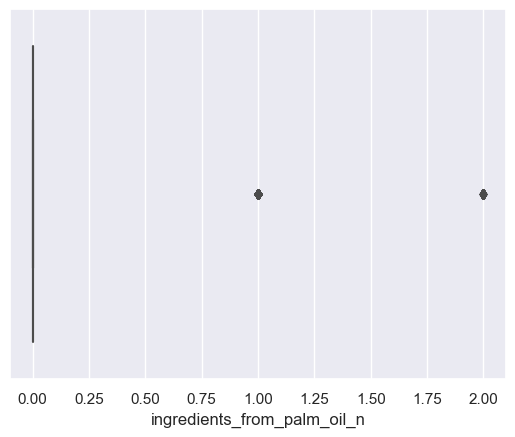

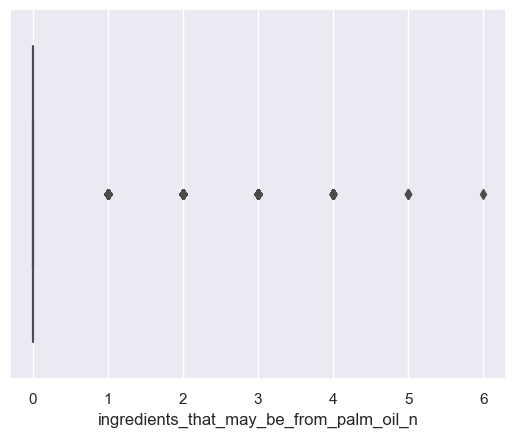

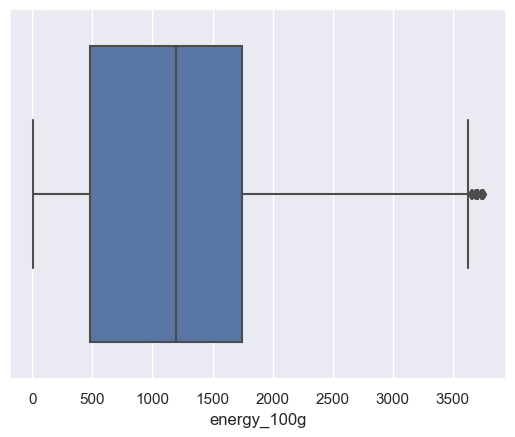

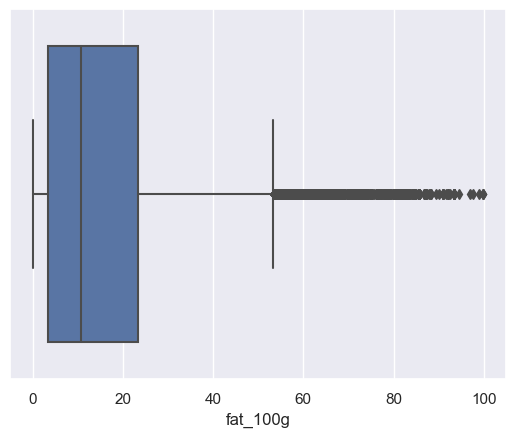

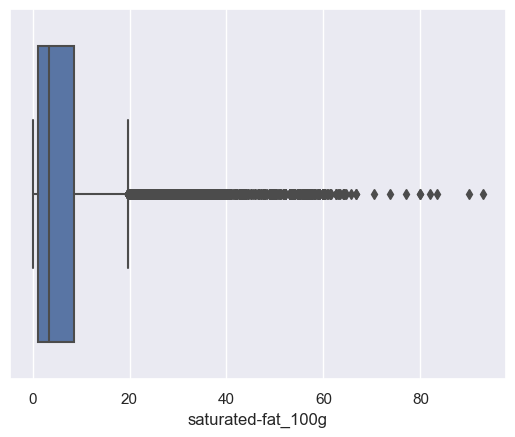

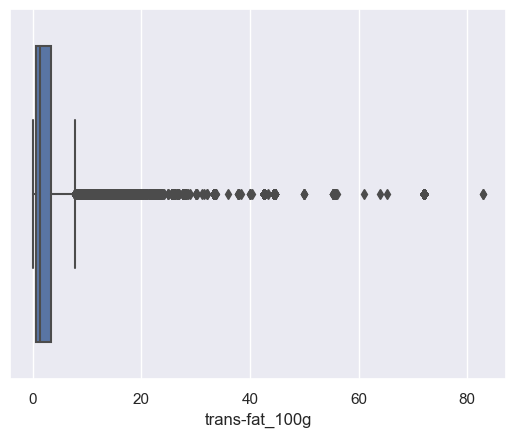

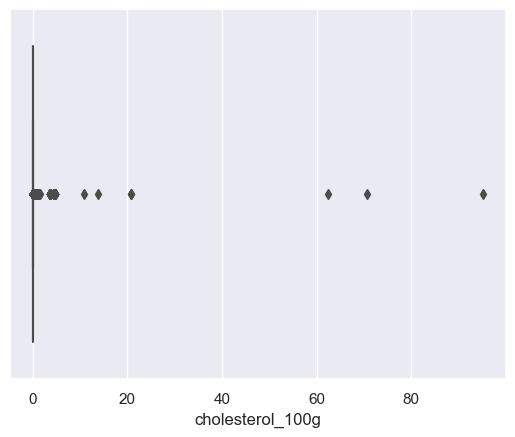

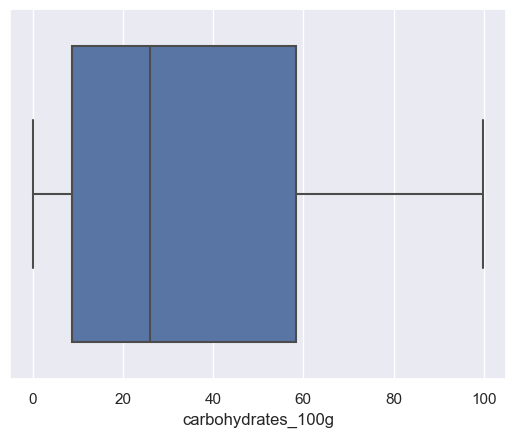

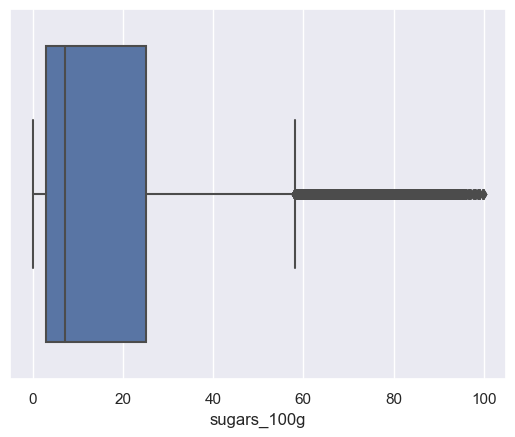

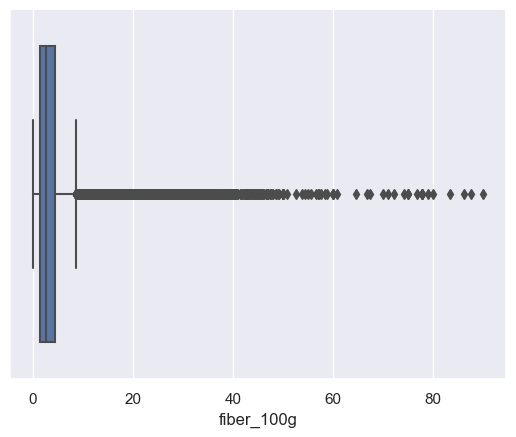

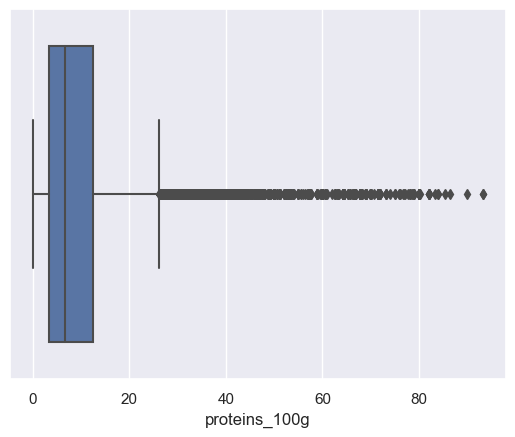

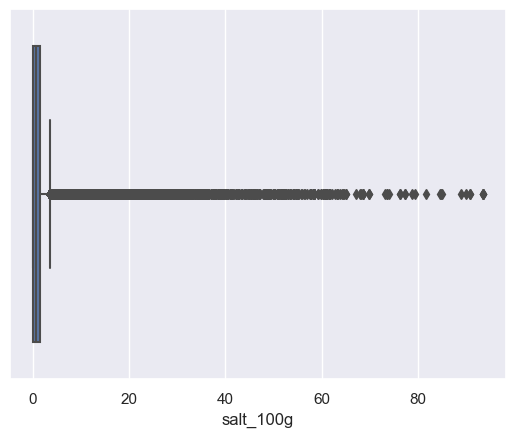

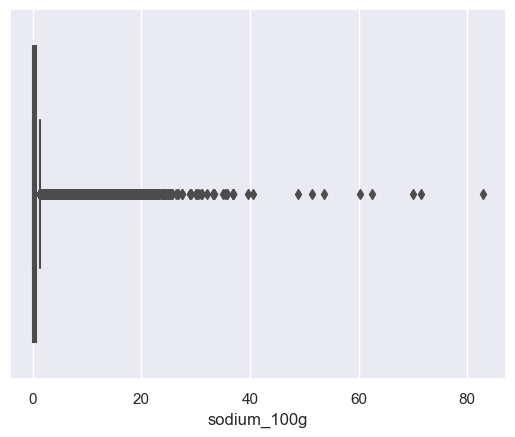

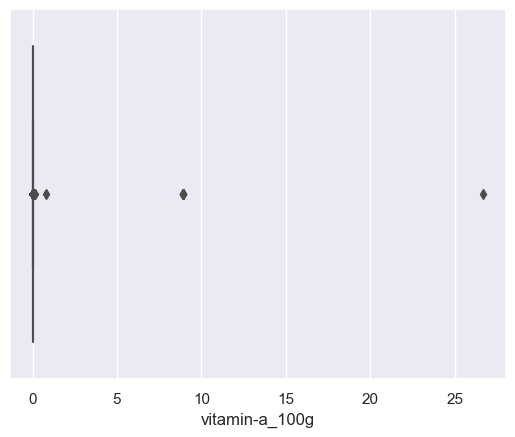

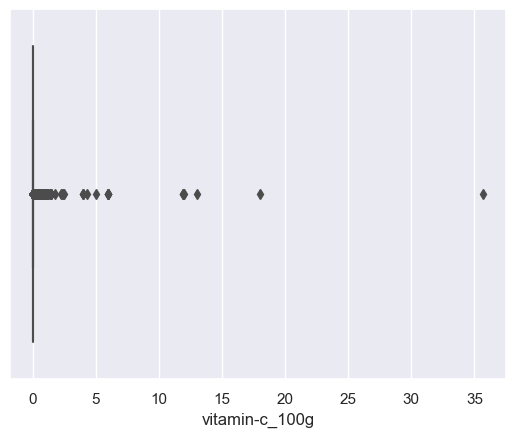

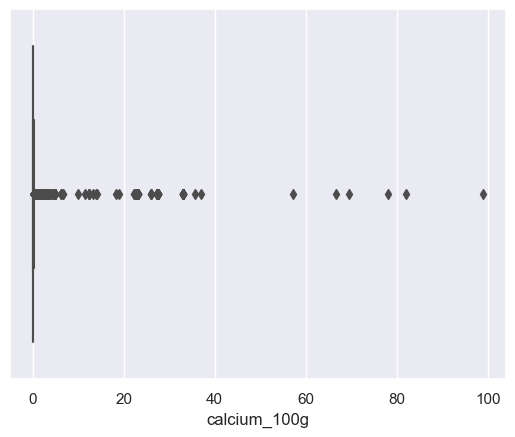

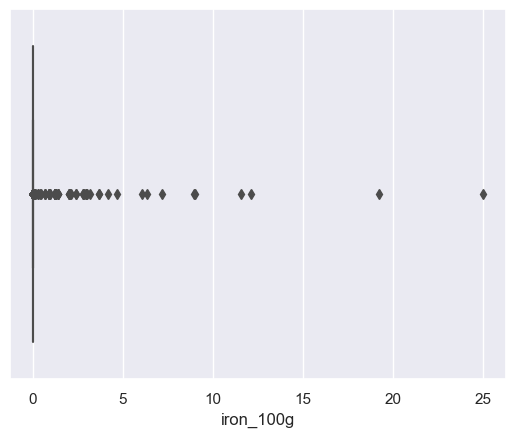

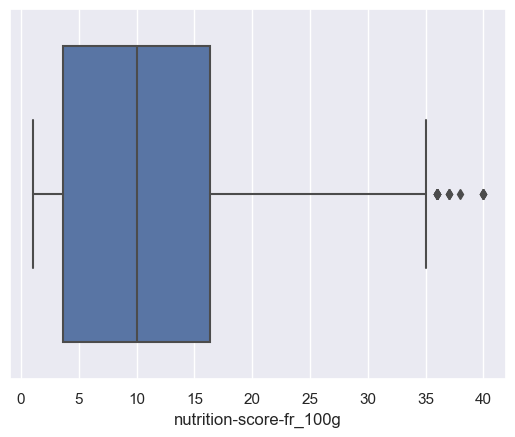

In [36]:
for col in df_cleaner.select_dtypes("float"):
    plt.figure() 
    sns.boxplot(df_cleaner[col])

En ayant fais le boxplot on peux voir que toute les distribution ne suivent pas une loi normale

### Analyse Bivarié

<AxesSubplot:>

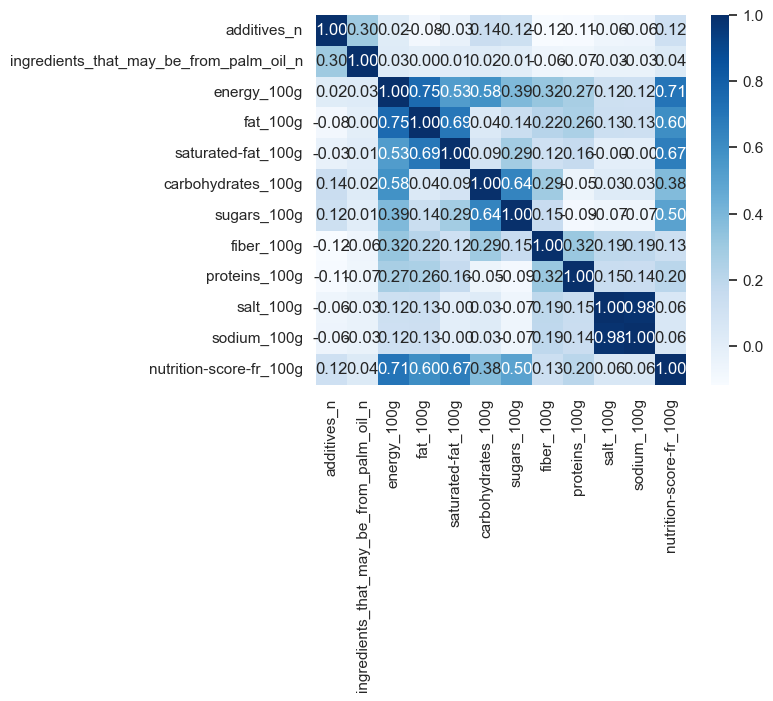

In [37]:
select_columns = ['additives_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']

sns.heatmap(df_cleaner[select_columns].corr(), annot= True, fmt=".2f", cmap="Blues", square=True)

##### Analyse du tableau :

- additives_n : pas de correlation forte




- ingredients_may_be..._palm_oil : pas de correlation forte



- energy_100g : forte corrélation avec: fat_100g, saturated-fat_100g, carbohydrates_100g, nutrition-score-fr_100g



- fat_100g: fortement corrélés avec: saturated-fat_100g 



- nutrition-score-fr_100g : forte corrélation avec: saturated_fat_100g, energy_100g, fat_100g



- sugars_100g : fortement corrélés avec: carbohydrates_100g




- sodium_100g:  fortement corrélés avec: salt_100g

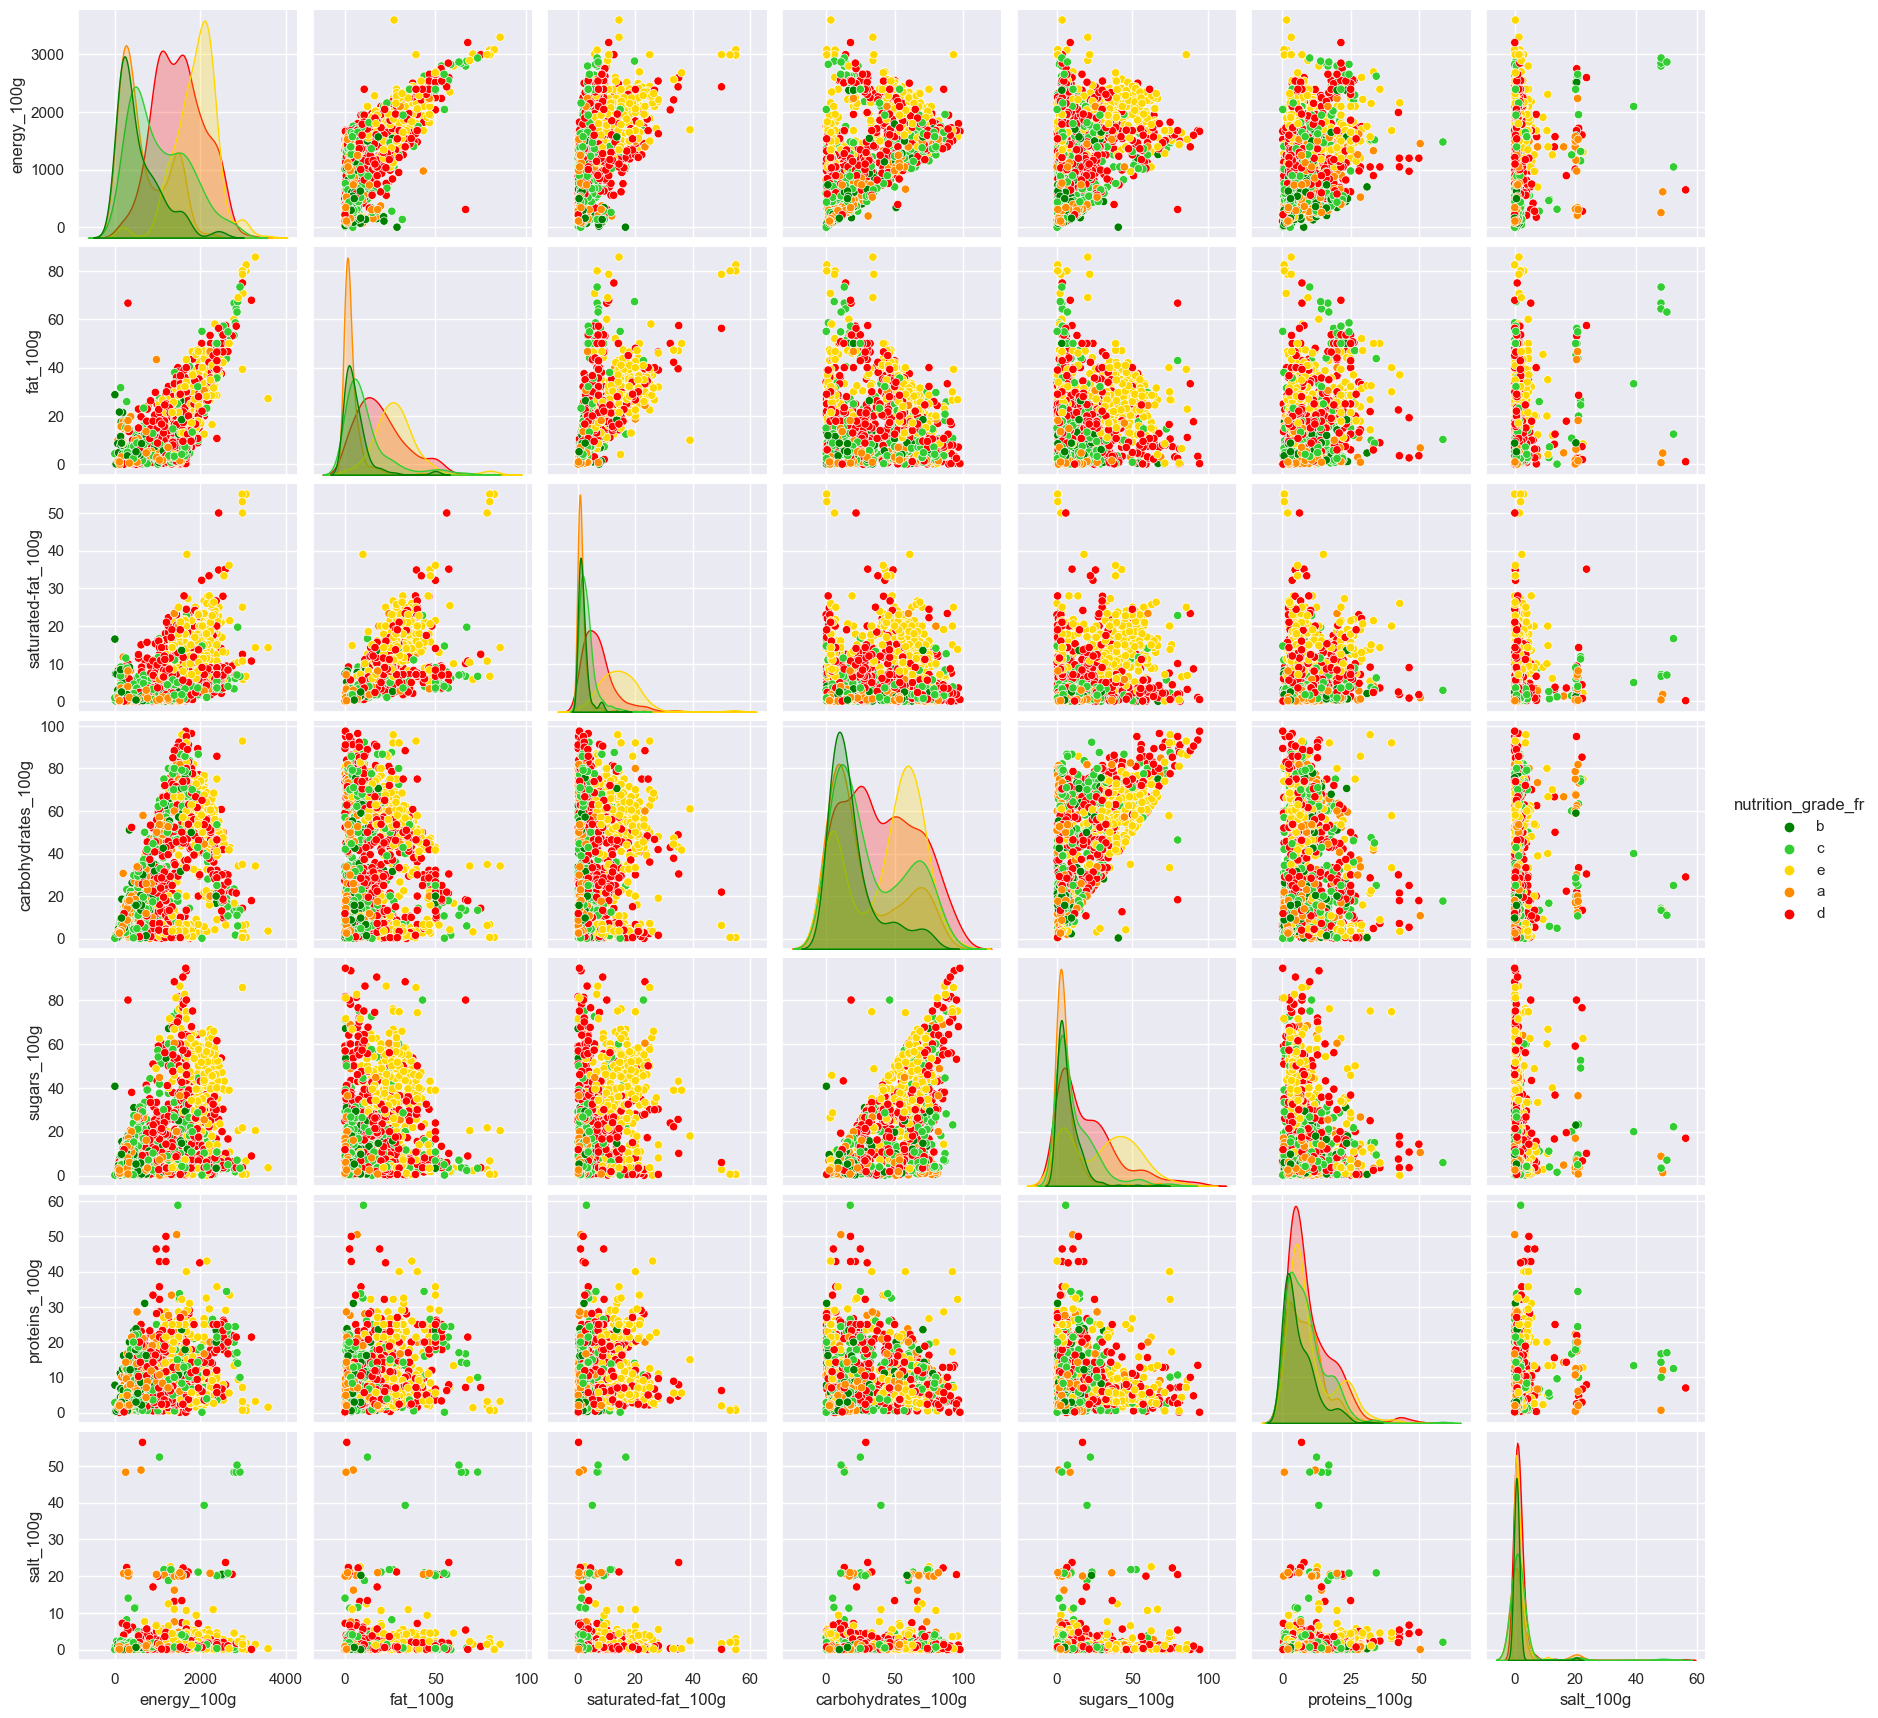

In [38]:
df_pairplot=df_cleaner[['nutrition_grade_fr','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g']].dropna(subset=['nutrition_grade_fr'])
df_pairplot=df_pairplot.sample(frac=0.01)
sns.pairplot(data=df_pairplot, hue='nutrition_grade_fr', palette=colors)

# ACP
L'analyse en composantes principales

In [39]:
df_cleaner.select_dtypes(include = ["float"]).columns

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [40]:
df_pca = df_cleaner[['energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g']]

In [41]:
n_components = 7
pca = PCA(n_components=n_components)
pca= PCA(n_components=len(df_pca.columns), svd_solver="full")

sc = StandardScaler()
X = sc.fit_transform(df_pca.values)

pca.fit(X)
var_r = pca.explained_variance_ratio_
var_r

array([0.39502879, 0.22307547, 0.14926069, 0.11440034, 0.07174617,
       0.03803387, 0.00845468])

In [42]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([39.5 , 22.31, 14.93, 11.44,  7.17,  3.8 ,  0.85])

In [43]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="black",marker='o')
    plt.title("Plot d'éboulis")

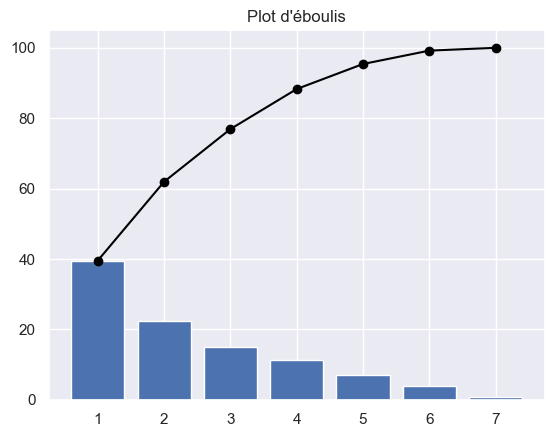

In [44]:
# choix du nombre de composantes à calculer
n_comp = 7

# selection des colonnes à prendre en compte dans l'ACP
df_acp = df_cleaner.dropna(subset=['nutrition_grade_fr'])
df_acp = df_acp[['energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g']]
df_acp=df_acp.sample(frac=0.5)

# préparation des données pour l'ACP
X = df_acp.values
nutri = df_acp.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
acp = decomposition.PCA(n_components=n_comp)
acp.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(acp)

In [45]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 40.,  62.,  77.,  88.,  95.,  99., 100.])

In [46]:
pcs = pca.components_
pcs

array([[ 0.55468014,  0.47691327,  0.44439004,  0.33766029,  0.34240993,
         0.17319541,  0.07839318],
       [ 0.00941042,  0.35825822,  0.21867264, -0.55398182, -0.52425521,
         0.43360666,  0.23235889],
       [ 0.07889951, -0.19027483, -0.37420858,  0.28995136,  0.00582232,
         0.28985981,  0.8058622 ],
       [-0.05875822,  0.20552015,  0.22039669, -0.16263821, -0.03045771,
        -0.79244129,  0.50039203],
       [-0.47189687, -0.21992882,  0.43121218, -0.27133567,  0.60513409,
         0.25427113,  0.19630737],
       [-0.06089674, -0.46140117,  0.61440242,  0.41772014, -0.47989361,
         0.00884642,  0.03231037],
       [-0.67540259,  0.55181702, -0.0515628 ,  0.46952479, -0.10229955,
         0.07262667, -0.0218458 ]])

In [47]:
x_pca= acp.fit_transform(X_scaled)
df_pca_t= df_acp.copy()
pcols = ["F"+str(i) for i in range (1,x_pca.shape[1]+1)]
df_pca_t.loc[:,:] = x_pca
df_pca_t.columns = pcols
df_pca_t["grade"]= df_cleaner["nutrition_grade_fr"]
df_pca_t

,F1,F2,F3,F4,F5,F6,F7,grade
151337,-1.924951,0.043820,-0.342626,0.225513,-0.020419,0.026985,-0.046839,b
119286,1.034917,0.969419,-0.865456,0.691196,-0.123825,-1.092270,-0.023888,d
65110,-0.601981,1.213600,-1.442624,1.274541,0.753528,0.355731,0.933226,b
173763,3.022742,-1.085063,-0.891574,0.427127,0.763448,-0.172825,-0.284309,e
86517,0.269521,-0.393035,-0.713606,0.529203,0.248662,-0.065810,-0.062370,d
...,...,...,...,...,...,...,...,...
88319,2.050901,2.313918,-0.289838,-0.635085,-1.476566,-1.430973,0.246256,c
97781,3.129252,-0.016908,-0.887918,-0.077503,0.607640,0.075432,-0.181360,e
150951,-0.350389,1.746122,-0.026074,-0.166726,0.273415,-0.068148,-0.113433,e
131876,-0.937930,1.515839,0.240570,-0.599249,0.359991,-0.125944,-0.149552,d


<AxesSubplot:>

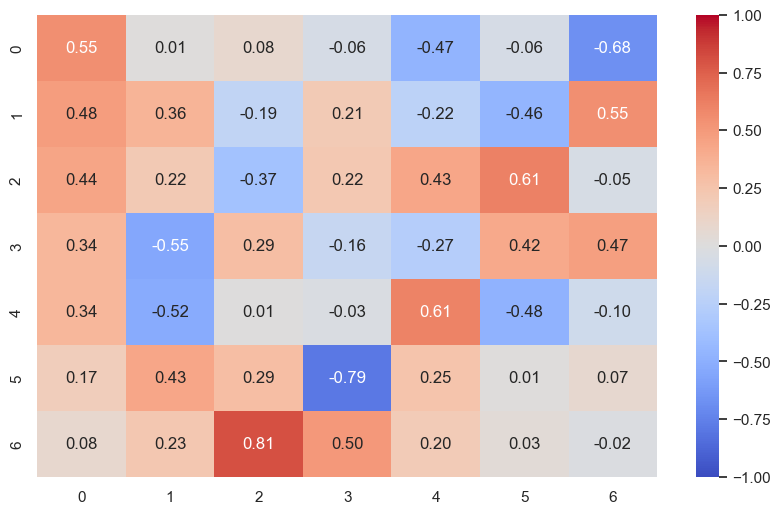

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

On évalue la force d'un scatter plot par la dispersion de ses points. En effet, si les points sont très dispersés, la relation entre les variables est faible. Si les points sont concentrés autour d'une droite, la relation entre les variables est forte.

<AxesSubplot:xlabel='F1', ylabel='F2'>

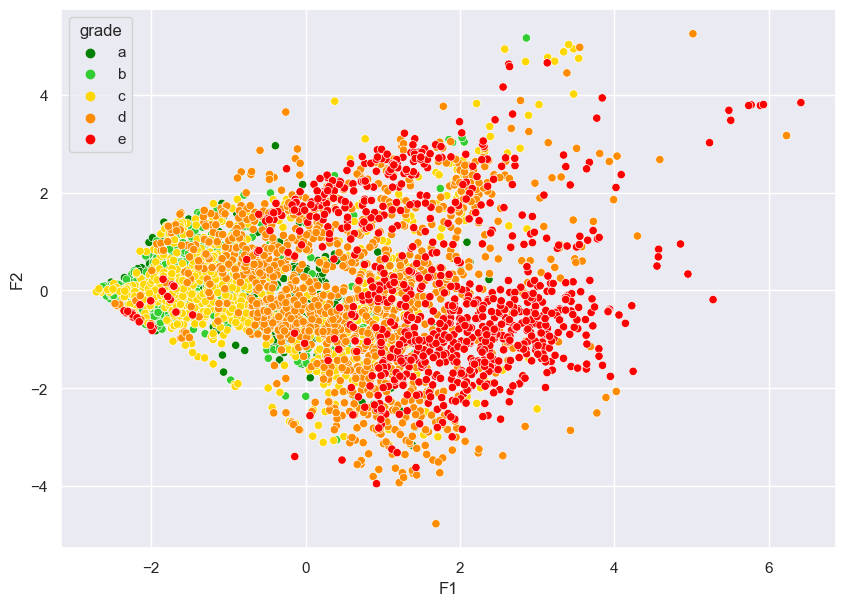

In [49]:
df_plot =df_pca_t.sample(frac=.05).sort_values("grade")

fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=df_plot, x="F1", y="F2", hue="grade", palette=colors)

On peut voir ici que les points sont concentrés autour d'une droite, la relation entre les variables est forte.

Les grades A, B et C sont très concentrées entre eux. Tandis que les points des grades D et E sont très dispercés entre eux.

<AxesSubplot:xlabel='F3', ylabel='F4'>

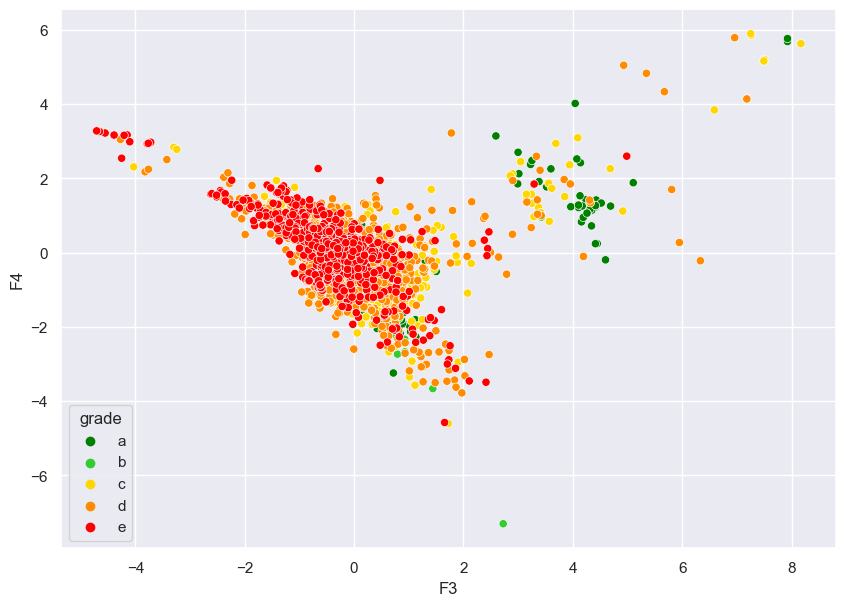

In [50]:
df_plot =df_pca_t.sample(frac=.05).sort_values("grade")

fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=df_plot, x="F3", y="F4", hue="grade", palette=colors)

On peut voir ici que les points sont très dispersés autour d'une droite, donc la relation entre c'est deux variables est faible.

Les grades D et E sont très concentrées entre eux. Tandis que les points des grades A, B et C sont très dispercés entre eux.

In [51]:
features = df_cleaner.columns
features

Index(['product_name', 'countries_fr', 'ingredients_text', 'serving_size',
       'additives_n', 'additives', 'additives_fr',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states_fr', 'nutrition_grade_fr.1', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [52]:
feature = features.columns = ['energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g']
feature


['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g']

In [53]:
def correlation_graph(pca, x_y, features) : 
    """
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit 
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    """
   # Extrait x et y 
    x,y=x_y
   # Taille de l'image 
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, pca.components_[x, i], pca.components_[y, i], head_width=0.07, head_length=0.07, width=0.02)

        # Les labels
        plt.text(pca.components_[x, i] + 0.05, pca.components_[y, i] + 0.05, features[i])
        
    plt.plot([-1, 1], [0, 0], color='black', ls='--')
    plt.plot([0, 0], [-1, 1], color='black', ls='--')

    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an)) 

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [54]:
x_y = (0,1)
x_y

(0, 1)

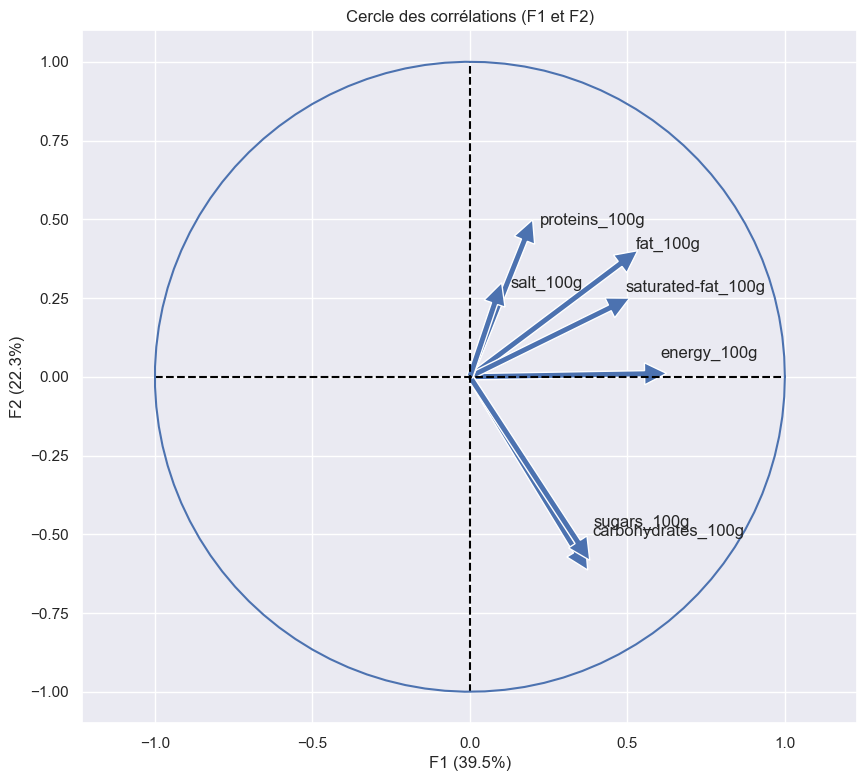

In [55]:
correlation_graph(pca, x_y, feature)

Les variables les plus corrélées à F1 sont :

energy_100g, satured-fat_100g et fat_100g

Elles sont corrélées positivement à F1, mais on a aussi la variable sugars_100g et carbohydrates_100g qui est corrélée négativement à F1.

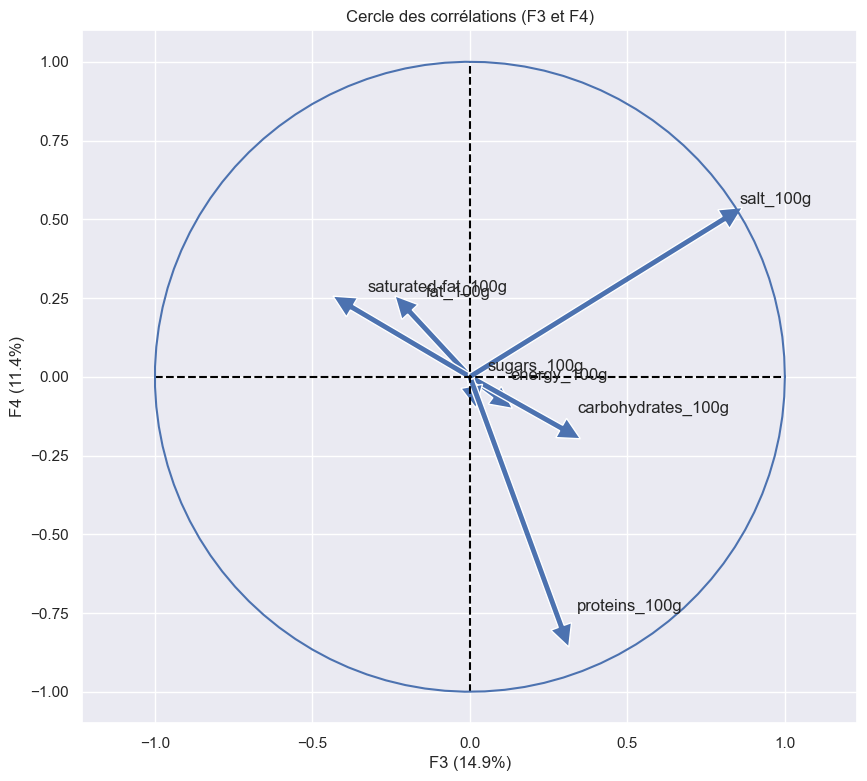

In [56]:
correlation_graph(pca, (2,3), feature)

# test de Kolmogorov-Smirnov:

Le kstest (test de Kolmogorov-Smirnov) sert à tester la normalité des distributions.

In [57]:
# Ktest (Kolmogorov-Smirnov test)

Test_Kolmogorov_S = df_cleaner.select_dtypes(include = ['float']).columns
Test_Kolmogorov_S = Test_Kolmogorov_S[3:13]

for column in Test_Kolmogorov_S:
    
    print(""' ...... {}'.format(column))
    
    D, p = stats.kstest(df_cleaner[column].dropna(), 'norm',  args=(df_cleaner[column].mean(), df_cleaner[column].std()))
    alpha = 0.05 # pour un seuil alpha de 0.05
    print(" -----------> p = {}".format(p))  
    
if p < alpha:  
    print()
else:
    print()

 ...... energy_100g
 -----------> p = 0.0
 ...... fat_100g
 -----------> p = 0.0
 ...... saturated-fat_100g
 -----------> p = 0.0
 ...... trans-fat_100g
 -----------> p = 0.0
 ...... cholesterol_100g
 -----------> p = 0.0
 ...... carbohydrates_100g
 -----------> p = 0.0
 ...... sugars_100g
 -----------> p = 0.0
 ...... fiber_100g
 -----------> p = 0.0
 ...... proteins_100g
 -----------> p = 0.0
 ...... salt_100g
 -----------> p = 0.0



On peux voir que l'hypothèse nulle est exclue pour les variables, car H0 est rejetée : Pour tout les variables car ce n'est pas des distributions normale

# methode Levene: 

La méthode Levene de SciPy. 

Cette méthode vérifie l'homogénéité des variances pour les distributions non normales. On peux voir qu'une fois de plus l'hypothèse nulle sera écartée.

In [58]:
df_cleaner['nutrition_grade_fr'].dropna().unique().tolist()

['d', 'b', 'c', 'a', 'e']

In [59]:

a = df_cleaner[df_cleaner['nutrition_grade_fr'] == 'a'].select_dtypes(['float']).dropna(axis=0).dropna(axis=1)
b = df_cleaner[df_cleaner['nutrition_grade_fr'] == 'b'].select_dtypes(['float']).dropna(axis=0).dropna(axis=1)
c = df_cleaner[df_cleaner['nutrition_grade_fr'] == 'c'].select_dtypes(['float']).dropna(axis=0).dropna(axis=1)
d = df_cleaner[df_cleaner['nutrition_grade_fr'] == 'd'].select_dtypes(['float']).dropna(axis=0).dropna(axis=1)
e = df_cleaner[df_cleaner['nutrition_grade_fr'] == 'e'].select_dtypes(['float']).dropna(axis=0).dropna(axis=1)

f_statistic, p = stats.f_oneway(a, b, c, d, e)

In [60]:
from scipy.stats import levene

In [61]:
mean = levene( f_statistic,p, center="mean")
median = levene( f_statistic,p, center="median")

print(mean)
print(median)

LeveneResult(statistic=5.232007406910179, pvalue=0.02815667801478735)
LeveneResult(statistic=1.8810221693852305, pvalue=0.1787064177717)


Pvalues< 0.05 une fois de plus l'hypothèse nulle sera écartée.

# Méthode Kruskal-Wallis (Anova non paramètrique):

Par conséquent, le test anova paramétrique n'est pas applicable à ces ensembles de données. 

- Une solution consiste à appliquer le test de Kruskal-Wallis.

- C'est une version non paramétrique de l'anova. 

- Il teste l'hypothèse nulle selon laquelle la médiane de la population de tous les groupes est égale.  

On verra que les échantillons ont des médianes différentes.

In [62]:
# Préparation des données pour le test statistique Kruskal-Wallis (Anova non paramètrique)
# Pour chaque variable, test d'echantillon

nutri=['energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g']

A = df_cleaner[df_cleaner['nutrition_grade_fr']=='a']
B = df_cleaner[df_cleaner['nutrition_grade_fr']=='b']
C = df_cleaner[df_cleaner['nutrition_grade_fr']=='c']
D = df_cleaner[df_cleaner['nutrition_grade_fr']=='d']
E = df_cleaner[df_cleaner['nutrition_grade_fr']=='e']

print("--------------------------------------------------------")

for test in nutri:
    print(test)
    kruska = scipy.stats.kruskal(A[test], B[test], C[test], D[test],E[test])
    print('H =',kruska)
    
print("--------------------------------------------------------")   

samples=[A,B,C,D,E]

grade = ['A','B','C','D','E']

for test in nutri:
    print('\nTest de Kruskal-Wallis pour',test)
    for n in range(len(samples)):
        for i in range(n+1, len(samples)):
                kruska=scipy.stats.kruskal(samples[n][test], samples[i][test])
                print('Grade '+grade[n]+' et grade '+grade[i]+' : H=',kruska[1])


--------------------------------------------------------
energy_100g
H = KruskalResult(statistic=74159.85002895546, pvalue=0.0)
fat_100g
H = KruskalResult(statistic=80814.05231630483, pvalue=0.0)
saturated-fat_100g
H = KruskalResult(statistic=95177.93258567923, pvalue=0.0)
carbohydrates_100g
H = KruskalResult(statistic=14721.995624240564, pvalue=0.0)
sugars_100g
H = KruskalResult(statistic=35843.59127816292, pvalue=0.0)
proteins_100g
H = KruskalResult(statistic=8422.424155741985, pvalue=0.0)
salt_100g
H = KruskalResult(statistic=16784.279605020198, pvalue=0.0)
--------------------------------------------------------

Test de Kruskal-Wallis pour energy_100g
Grade A et grade B : H= 1.0465523574004937e-272
Grade A et grade C : H= 0.0
Grade A et grade D : H= 0.0
Grade A et grade E : H= 0.0
Grade B et grade C : H= 0.0
Grade B et grade D : H= 0.0
Grade B et grade E : H= 0.0
Grade C et grade D : H= 0.0
Grade C et grade E : H= 0.0
Grade D et grade E : H= 0.0

Test de Kruskal-Wallis pour fat_10

- Dans ces résultats, les estimations des médianes pour les échantillons des 7 groupes. L'hypothèse nulle veut que les médianes de population de ces groupes soient toutes égales. Les deux valeurs de p étant inférieures au seuil de signification de 0,05.On peux rejeter l'hypothèse nulle et conclure que les médianes ne sont pas égales.




- La p-value nous indique que la probabilité de rejeter l'hypothèse nulle alors qu'elle serait vraie est inférieure à 0.05. Dans ce cas, on peut rejeter en toute confiance l'hypothèse nulle



- La p-value du test étant en majorité égal à 0. On peut donc rejeter l'hypothèse nulle (selon laquelle les données proviennent d'une distribution normale)